In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np
np.random.seed(2019)

import matplotlib.pyplot as plt
%matplotlib inline

import requests #pobranie danych
from io import BytesIO
from PIL import Image

In [4]:
#Load ResNet model
model = ResNet50(weights = 'imagenet')

102973440/102967424 [==============================] - 2s 0us/step


![](https://m.wm.pl/2019/01/z9/kot-3-524198.jpg)

In [0]:
url_img = 'http://m.wm.pl/2019/01/z9/kot-3-524198.jpg'

In [0]:
#Transforming the size to 224 x 224
response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize( (224,224) )

#Preprocessing

In [41]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

In [0]:
y_pred = model.predict(X)

#Decoding the class of the picture

In [58]:
y_dec_pred = decode_predictions(y_pred, top=3)[0]
y_dec_pred

[('n06359193', 'web_site', 0.63212025),
 ('n02783161', 'ballpoint', 0.06854625),
 ('n06596364', 'comic_book', 0.04213723)]

#Visualisation

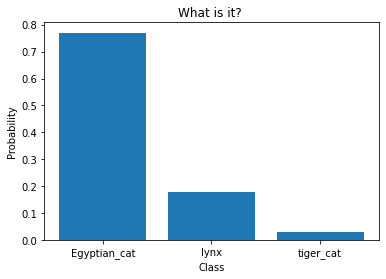

In [32]:
def show_result(y_dec_pred):
  plt.title('What is it? ')
  plt.xlabel('Class')
  plt.ylabel('Probability')

  values = [x[2] for x in y_dec_pred]
  labels = [x[1] for x in y_dec_pred]
  idxs = range(len(values))

  plt.bar( idxs, values )
  plt.xticks( idxs, labels)

show_result(y_dec_pred)

#Let's try to predict a class for other  pictures....

![](https://s3.viva.pl/newsy/simpsonowie-548271-GALLERY_BIG.jpg)

In [0]:
url_img = 'https://s3.viva.pl/newsy/simpsonowie-548271-GALLERY_BIG.jpg'
response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize( (224,224) )

In [54]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

In [59]:
y_pred = model.predict(X)
y_dec_pred = decode_predictions(y_pred, top=3)[0]
y_dec_pred

[('n06359193', 'web_site', 0.63212025),
 ('n02783161', 'ballpoint', 0.06854625),
 ('n06596364', 'comic_book', 0.04213723)]

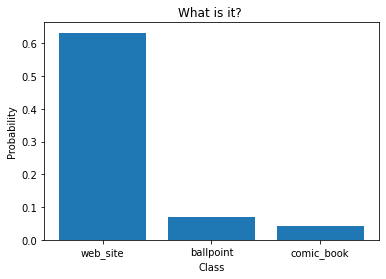

In [61]:
show_result(y_dec_pred)

![](https://www.psy.pl/wp-content/uploads/2005/11/shutterstock_492764050-e1486937044986-864x575.jpg)

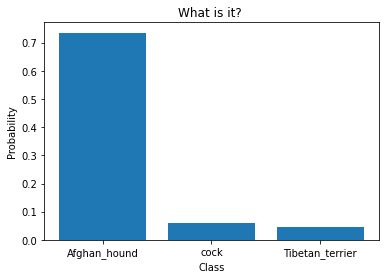

In [68]:
def read_and_pred(img_path): 

  response = requests.get(img_path)
  img = Image.open(BytesIO(response.content))
  img = img.resize( (224,224) )

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)

  preds = model.predict(X)
  return decode_predictions(preds, top=3)[0]

show_result(read_and_pred('https://www.psy.pl/wp-content/uploads/2005/11/shutterstock_492764050-e1486937044986-864x575.jpg'
) )

![](http://naukawpolsce.pap.pl/sites/default/files/styles/strona_glowna_slider_750x420/public/202002/35217828_35217824.jpg?itok=7OtWHQiR)

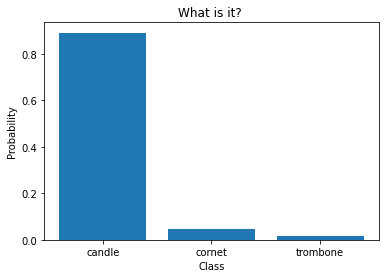

In [69]:
show_result(read_and_pred('http://naukawpolsce.pap.pl/sites/default/files/styles/strona_glowna_slider_750x420/public/202002/35217828_35217824.jpg?itok=7OtWHQiR'))